In [46]:
#Import packages
import scipy.integrate as scipy
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from collections import defaultdict
import json # for pretty printing

Initializing the model parameters and the number of patches.

In [55]:
n = 5    # Number of patches
#gamma = 0.32*np.ones(n)  # vector of removal or recovery rates with lenght n
#mu = 0.6*np.ones(n)  # vector of death rates with lenght n

Initializing the population size and the initial conditions.

In [56]:
 # vector of population sizes with lenght n
N = np.array([204  # Bromma
              , 217  # Oja
              , 1895  # S Maria Ystad 1749
              , 554  # Valleberga
              , 693  # S Kopinge
              , 403  # Horups
              , 582  # Bjäresjö 1780
              , 716  # Villie 1749
              , 418  # Snårestad 1775
              , 519  # Skårby 1749
              , 262  # Hammenhögs 1749
              , 560  # Glemminge 1775
              , 236  # Balkåkra 1775
              , 334  # Baldringe 1749
              , 299  # Ovraby
              , 761  # Sövestads 1749
              , 776  # Löderups 1749
              , 951  # Borrby 1775
              , 358  # Tosterups 1775
              ]) 

# Initial conditions for each patch

I0 = np.zeros(n)  # vector of initial infecteds with lenght n
I0[0] = 1.0  # the first element of the I0 vector is set to 1

S0 = np.zeros(n)  # vector of initial susceptibles with lenght n
for i in range(n):
    S0[i] = N[i] - I0[i]

R0 = np.zeros(n)  # vector of initial removeds with lenght n
D0 = np.zeros(n)  # vector of initial deaths with lenght n

print(S0,I0,R0,D0)

[ 203.  217. 1895.  554.  693.] [1. 0. 0. 0. 0.] [0. 0. 0. 0. 0.] [0. 0. 0. 0. 0.]


In [57]:
#Defining the transmission rate matrix as a function of two parameters

def TransmissionRateMatrix(beta:float, p:float): 
    return [
        [beta, p, 0, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, p, 0, p, 0, 0, 0],
        [p, beta, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, p, 0, 0, 0, 0, 0],
        [0, p, beta, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, p, 0, 0, 0, 0, 0],
        [0, 0, 0, beta, 0, p, 0, 0, 0, 0, 0, p, 0, p, 0, 0, 0, 0, 0, p, 0, 0],
        [0, 0, p, 0, beta, 0, 0, 0, 0, 0, 0, p, 0, p, 0, 0, 0, p, 0, 0, 0, p],
        [0, 0, 0, p, 0, beta, 0, 0, 0, 0, 0, 0, p, p, 0, 0, 0, 0, 0, p, p, 0],
        [p, 0, 0, 0, 0, 0, beta, 0, 0, 0, p, 0, 0, 0, p, 0, p, 0, p, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, beta, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, beta, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, p, 0, beta, 0, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, p, 0, p, 0, beta, 0, 0, 0, p, 0, 0, 0, p, 0, 0, 0],
        [0, 0, 0, p, p, 0, 0, 0, 0, 0, 0, beta, 0, p, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, beta, 0, 0, 0, 0, 0, 0, 0, p, 0],
        [0, 0, 0, p, p, p, 0, 0, 0, 0, 0, p, 0, beta, 0, 0, 0, 0, 0, 0, 0, p],
        [0, 0, 0, 0, 0, 0, p, 0, 0, p, p, 0, 0, 0, beta, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, beta, 0, 0, p, 0, 0, 0],
        [p, p, p, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, beta, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, beta, 0, 0, 0, p],
        [p, 0, 0, 0, 0, 0, p, 0, 0, 0, p, 0, 0, 0, 0, p, 0, 0, beta, 0, 0, 0],
        [0, 0, 0, p, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, beta, p, 0],
        [0, 0, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, p, beta, 0],
        [0, 0, 0, 0, p, 0, 0, 0, 0, 0, 0, 0, 0, p, 0, 0, 0, p, 0, 0, 0, beta]
        ]  
print(TransmissionRateMatrix(2,1)[0][0])      

2


In [18]:
TotalDeathsByParish = np.array([0,40,740,0,80,60,0,0,38,70,0,0,45,0,0,0,270,45,0])#zero means we don't have information
BeginPlagueByParish = np.array([1,61,61,91,91,91,91,121,121,121,121,121,121,121,151,181,271,331,511])#initial day for each parish
EndPlagueByParish = np.array([60,360,270,120,300,120,120,150,510,270,150,150,240,150,180,270,570,570,570])#fix it considering that we don't have the end date for all

Generating the differential equations

In [76]:
def SIRD_model(y, t,
               model_parameters : tuple[dict]):
    '''The main set of equations'''

    parameters = model_parameters[0]
    beta : float = parameters['beta']
    gamma : float = parameters['gamma']
    p : float = parameters['p']
    mu :float = parameters['mu']
    N = parameters['N']
    n : int = parameters['n']

    S = defaultdict(float)
    I = defaultdict(float)
    R = defaultdict(float)
    D = defaultdict(float)

    vars = tuple(sum([ [ S[i], I[i], R[i], D[i] ] for i in range(n) ], []))
    vars = y

    def entryS(i):
        return vars[4 * i]
    def entryI(i):
        return vars[4 * i + 1]
    def entryR(i):
        return vars[4 * i + 2]
    def entryD(i):
        return vars[4 * i + 3]

    # print(y)
    # beta = 0.5
    # p = 0.5
    # gamma = 0.32
    # mu = 0.6

    dS = {}
    dI = {}
    dR = {}
    dD = {}

    # Calculate number currently in Subpopulation i
    for i in range(n):
        dS[i] = - entryS(i) / (N[i]*1.0) * sum(TransmissionRateMatrix(beta,p)[i][j] * entryI(j) for j in range(n))
        dI[i] = entryS(i) / (N[i]*1.0) * sum(TransmissionRateMatrix(beta,p)[i][j] * entryI(j) for j in range(n)) - gamma * entryI(i)
        dR[i] = gamma * mu * entryI(i)
        dD[i] = gamma * (1 - mu) * entryI(i)

    derivates = sum([ [ dS[i], dI[i], dR[i], dD[i] ] for i in range(n) ], [])
    return derivates   # For odeint

def generate_sol(genInput: dict) -> dict:
    model = genInput['model']
    init = genInput['init']
    beta = genInput['beta']
    gamma = genInput['gamma']
    mu = genInput['mu']
    n = genInput['n']
    p = genInput['p']
    N = genInput['N']
    T = genInput['T']

    initConditions = tuple(sum([ [ init['S'][i], init['I'][i], init['R'][i], init['D'][i] ] for i in range(n) ], []))
    #print(initConditions)
    # Time vector
    t = np.linspace(0, T, T+1)
    # Result
    solution = scipy.odeint(model, initConditions, t, args=((genInput,),))
    
    return {'S': solution[:, 0],
            'I': solution[:, 1],
            'R': solution[:, 2],
            'D': solution[:, 3],
            'N': N,
            'init': init,
            'beta': beta,
            'gamma': gamma,
            'mu': mu,
            't': t,
            'n' : n,
            'p' : p,
            'model': model,
            'solution': solution}


Model_test = {'model': SIRD_model,
            'init': {
                'S': S0,
                'I': I0,
                'R': R0,
                'D': D0,
            },
            'beta': 0.5,
            'gamma': 0.32,
            'mu': 0.6,
            'N': N,
            'n': 2,
            'p': 0.5,
            'T': 5}

model_dict = generate_sol(Model_test)
print(model_dict['solution'])

[[2.03000000e+02 1.00000000e+00 0.00000000e+00 0.00000000e+00
  2.17000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.02290034e+02 1.34456046e+00 2.19243113e-01 1.46162075e-01
  2.16286462e+02 6.21526363e-01 5.52068925e-02 3.68045950e-02]
 [2.00904746e+02 2.18274165e+00 5.47507660e-01 3.65005106e-01
  2.14893771e+02 1.66417077e+00 2.65235076e-01 1.76823384e-01]
 [1.98234073e+02 3.90981240e+00 1.11366882e+00 7.42445877e-01
  2.12207199e+02 3.54714163e+00 7.47395598e-01 4.98263732e-01]
 [1.93202466e+02 7.21566871e+00 2.14911892e+00 1.43274594e+00
  2.07139720e+02 6.98369545e+00 1.72595082e+00 1.15063388e+00]
 [1.84119697e+02 1.31285547e+01 4.05104899e+00 2.70069933e+00
  1.97972008e+02 1.30344859e+01 3.59610389e+00 2.39740259e+00]]


In [97]:
def SIRD_model(y, t,
               model_parameters: tuple[dict]):
    '''The main set of equations'''

    parameters = model_parameters[0]
    beta: float = parameters['beta']
    gamma: float = parameters['gamma']
    p: float = parameters['p']
    mu: float = parameters['mu']
    N = parameters['N']
    n: int = parameters['n']

    S = defaultdict(float)
    I = defaultdict(float)
    R = defaultdict(float)
    D = defaultdict(float)

    vars = tuple(sum([[S[i], I[i], R[i], D[i]] for i in range(n)], []))
    vars = y

    def entryS(i):
        return vars[4 * i]

    def entryI(i):
        return vars[4 * i + 1]

    def entryR(i):
        return vars[4 * i + 2]

    def entryD(i):
        return vars[4 * i + 3]

    # print(y)
    # beta = 0.5
    # p = 0.5
    # gamma = 0.32
    # mu = 0.6

    dS = {}
    dI = {}
    dR = {}
    dD = {}

    # Calculate number currently in Subpopulation i
    for i in range(n):
        dS[i] = - entryS(i) / (N[i]*1.0) * sum(TransmissionRateMatrix(beta, p)
                                               [i][j] * entryI(j) for j in range(n))
        dI[i] = entryS(i) / (N[i]*1.0) * sum(TransmissionRateMatrix(beta, p)
                                             [i][j] * entryI(j) for j in range(n)) - gamma * entryI(i)
        dR[i] = gamma * mu * entryI(i)
        dD[i] = gamma * (1 - mu) * entryI(i)

    derivates = sum([[dS[i], dI[i], dR[i], dD[i]] for i in range(n)], [])
    return derivates   # For odeint


def generate_sol(genInput: dict) -> dict:
    model = genInput['model']
    init = genInput['init']
    beta = genInput['beta']
    gamma = genInput['gamma']
    mu = genInput['mu']
    n = genInput['n']
    p = genInput['p']
    N = genInput['N']
    T = genInput['T']

    initConditions = tuple(sum(
        [[init['S'][i], init['I'][i], init['R'][i], init['D'][i]] for i in range(n)], []))
    # print(initConditions)
    # Time vector
    t = np.linspace(0, T, T+1)
    # Result
    solution = scipy.odeint(model, initConditions, t, args=((genInput,),))

    indexVar = {}
    indexVar['S'] = 0
    indexVar['I'] = 1
    indexVar['R'] = 2
    indexVar['D'] = 3

    def varSol(patch, var):
        return solution[:, 4*patch + indexVar[var]]

    return {'S': {patch: varSol(patch, 'S') for patch in range(n)},
            'I': {patch:  varSol(patch, 'I') for patch in range(n)},
            'R': {patch: varSol(patch, 'R') for patch in range(n)},
            'D': {patch: varSol(patch, 'D') for patch in range(n)},
            'N': N,
            'init': init,
            'beta': beta,
            'gamma': gamma,
            'mu': mu,
            't': t,
            'n': n,
            'p': p,
            'model': model,
            'raw_solution': solution}


Model_test = {'model': SIRD_model,
              'init': {
                  'S': S0,
                  'I': I0,
                  'R': R0,
                  'D': D0,
              },
              'beta': 0.5,
              'gamma': 0.32,
              'mu': 0.6,
              'N': N,
              'n': 2,
              'p': 0.5,
              'T': 60}

model_dict = generate_sol(Model_test)
#print(model_dict['S'][0])


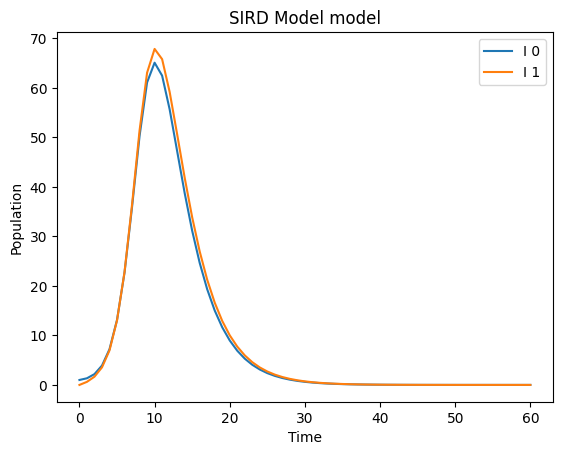

In [100]:
def plot_SIRD_solution(model: dict, state:list[str] = ['S', 'I', 'R', 'D','DailyDeaths']):
    """
    Plots the susceptible, infected, and recovered populations over time for one SIR model.
    
    Parameters:
    - model (dict): a dictionary containing the following fields:
        - "t": a NumPy array of time values
        - "S": a NumPy array of susceptible population values at each time value
        - "I": a NumPy array of infected population values at each time value
        - "R": a NumPy array of recovered population values at each time value
    Returns:
    - None
    """
    for key in state:
        if key not in model:
            raise ValueError(f"Invalid state: {key}")
        for i in range(model['n']):
            plt.plot(model['t'], model[key][i], label=f'{key} {i}')
            
    #if 'DailyDeaths' in state:
        #t_inf = model['t'].argmin()
       # t_sup = model['t'].argmax()
       # print(t_inf, t_sup)
        #plt.plot(daily_deaths(model, t_inf, t_sup), label='Daily Deaths')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('SIRD Model model')
    plt.legend()
    plt.show()

plot_SIRD_solution(model_dict,state=['I'])

TypeError: unhashable type: 'dict'

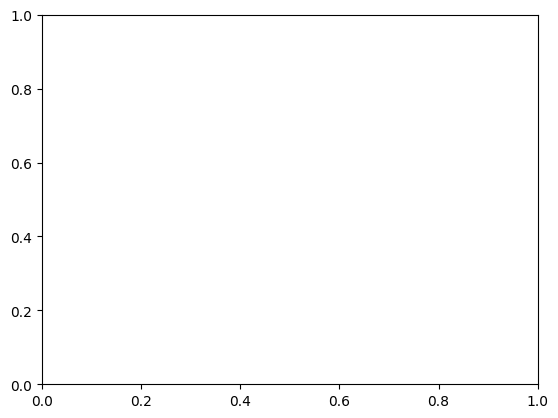

In [70]:
for i in range(n):
    pl.plot(model_dict, model_dict['S'][i], label='Susceptible')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.legend(loc=1,prop={'size': 10})
pl.show()

# skdjaksjal

In [83]:
#ODEs
def SIRD_model(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dS_dt = - beta * I * (S / ((S+I+R)*1.0))
    dI_dt = beta * I * (S / ((S+I+R)*1.0))  - gamma * I
    dR_dt = gamma * mu * I
    dD_dt = gamma * (1 - mu) * I
    return ([dS_dt, dI_dt, dR_dt,dD_dt])

In [104]:
#Parameters
gamma = 0.32
mu = 0.43
N = 299
beta = 0.358

#Initial condition
S0 = N-1
I0 = 1
R0 = 0.0
D0 = 0.0

#Time vector
t = np.linspace(0, 300, num=600)

#Result
solution = scipy.odeint(SIRD_model, [S0, I0, R0, D0], t, args=(N, beta, gamma,  mu))


In [85]:
print(solution)
dimension = solution.shape
print(dimension)


[[2.98000000e+02 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.97819671e+02 1.01857752e+00 6.47007712e-02 9.70511567e-02]
 [2.97636048e+02 1.03744764e+00 1.30601844e-01 1.95902766e-01]
 ...
 [1.73414044e+02 8.83856755e-04 5.02340290e+01 7.53510435e+01]
 [1.73413922e+02 8.65280260e-04 5.02340851e+01 7.53511276e+01]
 [1.73413803e+02 8.47094229e-04 5.02341399e+01 7.53512099e+01]]
(600, 4)


In [86]:
print(solution[10,3])

1.0549714060016375


In [90]:
# assuming `solution` is a numpy array
cumulative_deaths = [
      solution[i, 3] for i in range(solution.shape[0])
]
#for i in range(solution.shape[0]):
  # cumulative_deaths.append(solution[i, 3])
   #print(cumulative_deaths)
daily_deaths = [
   cumulative_deaths[i]-cumulative_deaths[i-1] 
   for i in range(1, len(cumulative_deaths),2)
   ]
#for i in range(1, len(cumulative_deaths)):
  #death_diff = cumulative_deaths[i]-cumulative_deaths[i-1]
  #daily_deaths.append(death_diff) 


In [91]:
#print(cumulative_deaths)
#len(cumulative_deaths)
print(range(solution.shape[0]))
print(daily_deaths)
len(daily_deaths)

range(0, 600)
[0.09705115674784814, 0.10068033468535983, 0.10442350298891068, 0.10828245624700206, 0.11225887884728558, 0.11635431211647607, 0.12057013770869207, 0.12490755745269522, 0.12936758220744426, 0.13395101241744278, 0.13865838935425767, 0.14349001777255488, 0.14844591593932277, 0.1535258024634576, 0.1587290712292928, 0.16405476403454466, 0.16950155386357135, 0.17506771496422857, 0.18075110293339236, 0.1865491274498572, 0.19245873106407085, 0.1984763643352938, 0.204597964151346, 0.2108189330899961, 0.21713411582878805, 0.22353778877399488, 0.2300236291441511, 0.23658472069535996, 0.2432135140042515, 0.24990185370272222, 0.2566409261597169, 0.26342131215769626, 0.2702329235798864, 0.27706508121205964, 0.283906445338463, 0.29074511318219365, 0.29756855389516446, 0.30436371570503873, 0.3111169782065648, 0.3178142580664378, 0.3244409907028203, 0.33098222230204044, 0.33742263786926685, 0.3437466008249572, 0.3499382914566773, 0.35598170660944106, 0.36186071823554755, 0.36755922295597

300

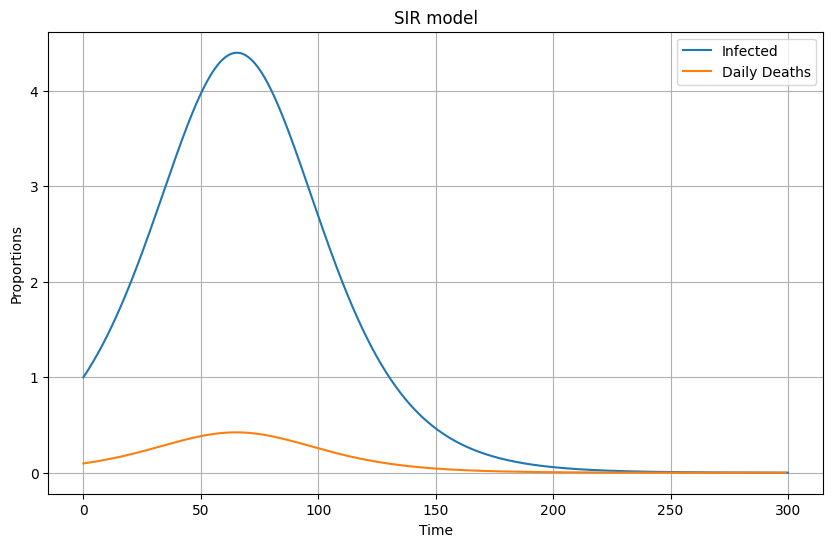

In [92]:
#Plot result
plt.figure(figsize=[10,6])
#plt.plot(t, solution[:,0], label='Susceptible')
plt.plot(t, solution[:,1], label='Infected')
#plt.plot(t, solution[:,2], label='Recovered')
#plt.plot(t, solution[:,3], label='Dead')
plt.plot(daily_deaths, label='Daily Deaths')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Proportions')
plt.title('SIR model')
plt.show()

Defining the transmission rate as a seasonality function

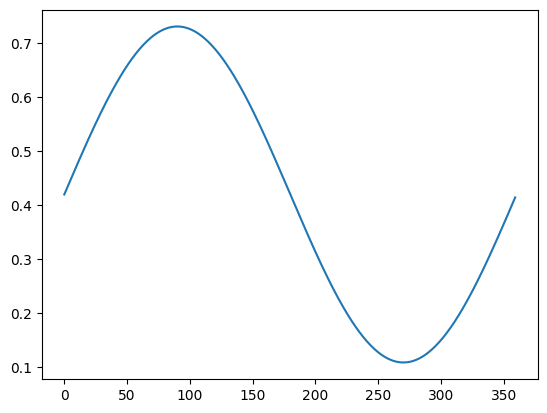

In [97]:

def seasonal_transmission_rate(beta_0, beta_1, frequency,a, t):
    beta_t = beta_0 * (1 + beta_1 * np.sin((2 * np.pi)* frequency * t))
    return beta_t

# Generate some example data with seasonality
t = np.arange(0, 360)
beta_0 = 0.42
beta_1 = 0.74

# Plot beta 
plt.plot(t, seasonal_transmission_rate(beta_0, beta_1, 1/(360*1.0),-1.2, t))
plt.show()



Generating the models for each patch

In [223]:
#ODEs
# def SIRD_model(y,t,model_parameters : tuple[dict]):
#     parameters = model_parameters[0]
#     beta = parameters['beta']
#     gamma = parameters['gamma']
#     mu = parameters['mu']
#     S, I, R, D = y
#     dS_dt = - beta * I * (S / ((S+I+R)*1.0))
#     dI_dt = beta * I * (S / ((S+I+R)*1.0))  - gamma * I
#     dR_dt = gamma * mu * I
#     dD_dt = gamma * (1 - mu) * I
#     return ([dS_dt, dI_dt, dR_dt, dD_dt])


In [228]:
# def generate_sol(genInput: dict) -> dict:
#     model = genInput['model']
#     init = genInput['init']
#     beta = genInput['beta']
#     gamma = genInput['gamma']
#     mu = genInput['mu']
#     N = genInput['N']
#     T = genInput['T']

#     # Time vector
#     t = np.linspace(0, T, T+1)
#     # Result
#     solution = scipy.odeint(model, init, t, args=((genInput,),))

#     return {'S': solution[:, 0],
#             'I': solution[:, 1],
#             'R': solution[:, 2],
#             'D': solution[:, 3],
#             'N': N,
#             'init': init,
#             'beta': beta,
#             'gamma': gamma,
#             'mu': mu,
#             't': t,
#             'model': model}


# Model_test = {'model': SIRD_model,
#             'init': [N-1, 1, 0.0, 0.0],
#             'beta': 0.5,
#             'gamma': 0.32,
#             'mu': 0.6,
#             'N': 299,
#             'T': 10}

# model_dict = generate_sol(Model_test)
#print(model_dict)

In [168]:

def daily_deaths(solution_model : dict, T_inf : int, T_sup : int) -> list[float]:
   assert T_inf >= 0, "t must be greater than 0"
   assert T_sup >= 0, "t must be greater than 0"
   return [solution_model['D'][t+1] - solution_model['D'][t]  for t in range(T_inf, T_sup) ]

daily_deaths(model_dict[1], 0, 10)    

[0.14010691584591933,
 0.16734095968732587,
 0.1997062360996596,
 0.2381002871481429,
 0.2835482116445526,
 0.337208098199832,
 0.40037036041372676,
 0.47444772466744056,
 0.5609515443085593,
 0.6614493851342789]

0 10


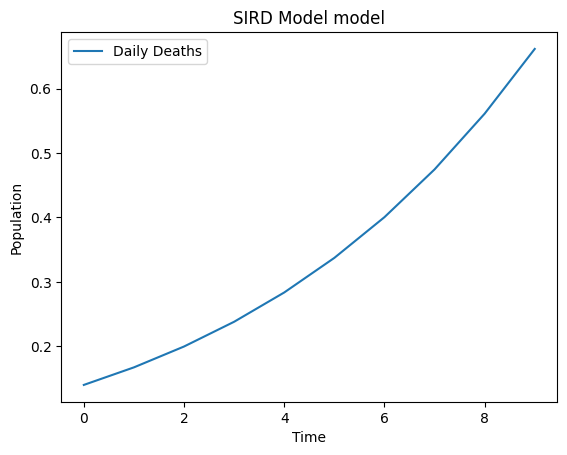

In [172]:
def plot_SIRD_solution(model: dict, state:list[str] = ['S', 'I', 'R', 'D','DailyDeaths']):
    """
    Plots the susceptible, infected, and recovered populations over time for one SIR model.
    
    Parameters:
    - model (dict): a dictionary containing the following fields:
        - "t": a NumPy array of time values
        - "S": a NumPy array of susceptible population values at each time value
        - "I": a NumPy array of infected population values at each time value
        - "R": a NumPy array of recovered population values at each time value
    Returns:
    - None
    """
    if 'S' in state:
        plt.plot(model['t'], model['S'], label='Susceptible')
    if 'I' in state:
        plt.plot(model['t'], model['I'], label='Infected')
    if 'R' in state:
        plt.plot(model['t'], model['R'], label='Recovered')
    if 'D' in state:
        plt.plot(model['t'], model['D'], label='Deaths')
    if 'DailyDeaths' in state:
        t_inf = model['t'].argmin()
        t_sup = model['t'].argmax()
        print(t_inf, t_sup)
        plt.plot(daily_deaths(model, t_inf, t_sup), label='Daily Deaths')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('SIRD Model model')
    plt.legend()
    plt.show()

plot_SIRD_solution(model_dict[1],state=['DailyDeaths'])